ANN_MLP

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load Dataset
df = pd.read_csv("iris.csv")  # Adjust path if needed
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [18]:
# Selecting only numerical features
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_id']  # Using species ID as target (numeric)

In [19]:
# Splitting dataset into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(20, 10), (30, 15), (40, 20)],  # Increasing neurons
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization tuning
    'learning_rate_init': [0.001, 0.01, 0.05]  # Learning rate tuning
}

In [22]:
# Initialize the MLP model
mlp = MLPClassifier(max_iter=1000, activation='relu', solver='adam', early_stopping=True, random_state=42)

In [23]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, max_iter=1000,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(20, 10), (30, 15), (40, 20)],
                         'learning_rate_init': [0.001, 0.01, 0.05]},
             scoring='accuracy')

In [24]:
# Best Model
best_model = grid_search.best_estimator_

In [25]:
# Predict on Test Data
y_pred = best_model.predict(X_test)

In [32]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Optimized Model Accuracy: 0.867

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10
           2       0.90      0.90      0.90        10

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.86        30
weighted avg       0.89      0.87      0.86        30



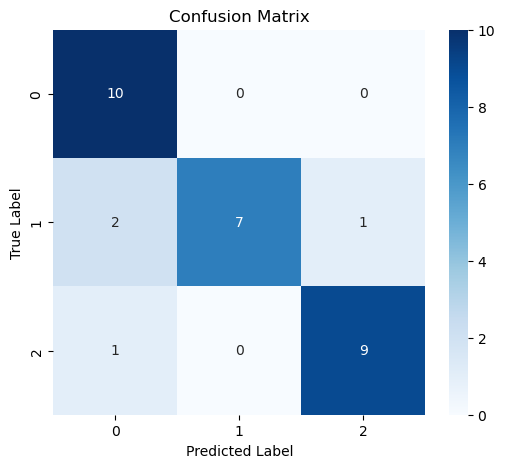

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [40]:
# Best Parameters
print("\nBest Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (40, 20), 'learning_rate_init': 0.05}


In [41]:
# Predict probabilities
probs = mlp.predict_proba(X_test)  # Softmax probabilities
print(probs[:5][1])  # Display first 5 predictions

[0.35194418 0.27027572 0.3777801 ]
